### Importing the libraries for Data analysis and Data visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### Importing the Classes for implementing the classification models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

### Uploading the Dataset which was taken from Kaggle.com

In [3]:
dataset = pd.read_csv('Musical_instruments_reviews.csv')
dataset.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
dataset.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


### Plotting the Distribution of the overall-ratings column

<AxesSubplot:>

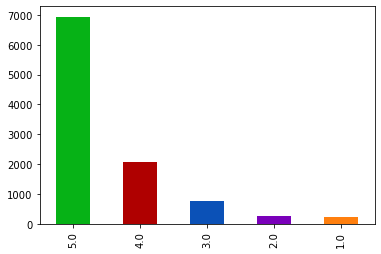

In [6]:
colors = ['#06b216', '#af0000', '#0b51b7', '#7a00ba', '#ff7f0e']

dataset['overall'].value_counts().plot.bar(color=colors)

### Checking for any null values

In [7]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

The ReviewName doesn't have much importance in classifying the texts, so dropping that column, and since the 'reviewText column' has some missing values, so just filling it with 'empty'

In [8]:
dataset['reviewText'] = dataset['reviewText'].fillna('Empty')

dataset.drop('reviewerName',axis=1,inplace=True)

In [9]:
dataset['Reviews'] = dataset['reviewText'] + dataset['summary']

dataset.drop(['reviewText', 'summary'], axis=1, inplace=True)

#### Checking if the new column has correctly concatenated

In [10]:
dataset['Reviews'].iloc[0]

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,good"

#### Making a function to categorize the overall-ratings into 'Negative, Neutral, and Positive'

In [11]:
def categorize(dataset):
    
    if dataset['overall'] == 3:
        result = 'Neutral'
        
    elif dataset['overall'] > 3:
        result = 'Positive'
        
    elif dataset['overall'] < 3:
        result = 'Negative'
        
    return result

In [12]:
dataset['Sentiment'] = dataset.apply(categorize, axis=1)

dataset.head()

,reviewerID,asin,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


### Importing the LabelEncoder class to encode the 'Sentiment' column into numerical values

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['Sentiment'] = encoder.fit_transform(dataset['Sentiment'])

### Only the Reviews and Sentiment columns are essential for sentiment analysis, so dropping the other columns

In [14]:
dataset = dataset.drop(['reviewerID', 'asin', 'helpful', 'overall', 'unixReviewTime', 'reviewTime'], axis=1)

dataset

,Reviews,Sentiment
0,"Not much to write about here, but it does exac...",2
1,The product does exactly as it should and is q...,2
2,The primary job of this device is to block the...,2
3,Nice windscreen protects my MXL mic and preven...,2
4,This pop filter is great. It looks and perform...,2
...,...,...
10256,"Great, just as expected. Thank to all.Five Stars",2
10257,I've been thinking about trying the Nanoweb st...,2
10258,I have tried coated strings in the past ( incl...,2
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",2


### Importing the libraries essential for NLP, and the libraries for stemming and cleaning the text data

In [15]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UMANG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Creating a list to store all the cleaned text data after stemming and removing all the stopwords

In [17]:
corpus = []

for i in range(0, 10261):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['Reviews'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove("isn't")
    
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['not much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price good',
 'product exactli quit afford not realiz doubl screen arriv even better expect ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine buy product jake',
 'primari job devic block breath would otherwis produc pop sound allow voic pass notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put job well',
 'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sag good windscreen money',
 'pop filter great look perform like studio filter record vocal elimin pop get record sing pop record vocal',
 'good bought anoth 

##### Using CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped in processing our data more efficiently.  Using TfidfVectorizer to consider the overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Reducing the max_features to 5000 to remove unnecessary words which will not be useful for the NLP process

In [20]:
tfidfv = TfidfVectorizer(max_features=5000)

X = tfidfv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y

array([2, 2, 2, ..., 2, 2, 2])

### Checking the Frequency of occurence of the sentiments

In [23]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0  467]
 [   1  772]
 [   2 9022]]


<AxesSubplot:>

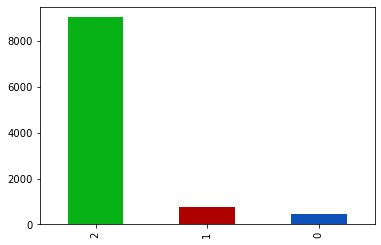

In [24]:
colors = ['#06b216', '#af0000', '#0b51b7']

dataset['Sentiment'].value_counts().plot.bar(color=colors)

#### The dataset is highly imbalanced, so resampling it by oversampling the minority data with the help of SMOTE class

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_res, y_res = smote.fit_resample(X, y)

In [26]:
(unique, counts) = np.unique(y_res, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 9022]
 [   1 9022]
 [   2 9022]]


#### Splitting the data into training and testing data, and computing the results

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Training using different models(using deault parameters) by creating their obejcts and iterating through their objects

In [29]:
log_reg = LogisticRegression()
d_tree = DecisionTreeClassifier()
r_forrest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
naive_bayes = MultinomialNB()
xgb = XGBClassifier()

model_map = {0:'Logistic Regression', 1:'Decision Tree', 2:'Random Forrest', 3:'KNN', 4:'SVM', 5:"Naive Bayes'", 6:'XG Boost'}
models = [log_reg, d_tree, r_forrest, knn, svm, naive_bayes, xgb]

In [30]:
for i,model in enumerate(models):
    
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    y_train_pred = models[i].predict(X_train)
    
    print('Report of {}:' .format(model_map[i]))
    print('Train set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_train, y_train_pred)*100))
    print('Test set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_test, y_pred)*100))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print('\n')

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Report of Logistic Regression:
Train set accuracy of Logistic Regression: 96.27748 %
Test set accuracy of Logistic Regression: 93.79387 %


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1764
           1       0.90      0.96      0.93      1832
           2       0.97      0.86      0.91      1818

    accuracy                           0.94      5414
   macro avg       0.94      0.94      0.94      5414
weighted avg       0.94      0.94      0.94      5414





Report of Decision Tree:
Train set accuracy of Decision Tree: 100.00000 %
Test set accuracy of Decision Tree: 89.71186 %


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1764
           1       0.87      0.92      0.89      1832
           2       0.91      0.82      0.86      1818

    accuracy                           0.90      5414
   macro avg       0.90      0.90      0.90      5414
weighted avg       0.90   

C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:13] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Report of XG Boost:
Train set accuracy of XG Boost: 98.86385 %
Test set accuracy of XG Boost: 95.95493 %


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1764
           1       0.95      0.96      0.95      1832
           2       0.95      0.94      0.94      1818

    accuracy                           0.96      5414
   macro avg       0.96      0.96      0.96      5414
weighted avg       0.96      0.96      0.96      5414







##### 1. Logistic Regression is giving great results.
##### 2. Decision Tree was over - trained
##### 3. Random Forest gave great results
##### 4. KNN – which works well with imbalanced datasets, was performing the worst. (without resampling, KNN was performing much better with                  an accuracy of around 87% on the test set)
##### 5. SVC took too much time for training, because of the large dataset and a lot of features.
##### 6. MultinomialNB works well with features which assume vector values, therefore implemented MultinomialNB, other classes of naive bayes'                  performed poorly
##### 7. XG Boost was one of the best model on this dataset

#### Applying k-fold cross validation for model validation, and to measure in the most relevant way the performance of each model by splitting the training set into a number of train_test folds to obtain the final accuracy as the average of the accuracies obtained on the train_test folds. (In this case, evaluating accuracy by cross-validation)

In [31]:
from sklearn.model_selection import cross_val_score

In [33]:
for i,model in enumerate(models):
    
    accuracies = cross_val_score(estimator=models[i], X=X_train, y=y_train, cv=10)
    
    print("Accuracy of {}: {:.5f} %".format(model_map[i], accuracies.mean()*100))
    print("Standard Deviation of {}: {:.5f} %".format(model_map[i], accuracies.std()*100))
    print('\n')

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy of Logistic Regression: 94.11602 %
Standard Deviation of Logistic Regression: 0.22641 %


Accuracy of Decision Tree: 88.71695 %
Standard Deviation of Decision Tree: 0.90032 %


Accuracy of Random Forrest: 97.20115 %
Standard Deviation of Random Forrest: 0.48689 %


Accuracy of KNN: 68.30776 %
Standard Deviation of KNN: 0.24284 %


Accuracy of SVM: 99.01624 %
Standard Deviation of SVM: 0.24098 %


Accuracy of Naive Bayes': 89.65456 %
Standard Deviation of Naive Bayes': 0.68470 %




C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:18] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:09] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:58] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:46] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:34] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:14] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:53] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:54] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:11] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:48] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XG Boost: 96.09270 %
Standard Deviation of XG Boost: 0.35529 %




### Function for plotting confusion matrix

In [34]:
def plot_cm(y_test, y_pred, figsize=(6,5)):
    
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    
    for i in range(nrows):
        for j in range(ncols):
            
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
                
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual Values'
    cm.columns.name = 'Predicted Values'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
    

#### Hyperparameter tuning(using GridSearchCV class) for finding the best version of the models, and to improve the accuracy further

In [35]:
from sklearn.model_selection import GridSearchCV

##### For Logistic Regression

In [36]:
parameters = {'C':np.logspace(-5,5,30), 
                 'penalty':['l1', 'l2']}

grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=5)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.33521152        nan 0.33521152        nan 0.33576575
        nan 0.40028617        nan 0.57186346        nan 0.67845853
        nan 0.71988681        nan 0.73882287        nan 0.75678888
        nan 0.77960436        nan 0.81008682        nan 0.84066143
        nan 0.87409948        nan 0.90702927        nan 0.92901343
        nan 0.9444854         nan 0.95381468        nan 0.95792515
        nan 0.96028066        nan 0.96198947        nan 0.96245135
        nan 0.96392933        nan 0.96439116        nan 0.96499161
        nan 0.96554576        nan 0.96628472        nan 0.96757787
        nan 0.96771654        nan 0.96831686        nan 0.96891729]
  warnings.warn(


Accuracy: 96.89173 %
Best Parameters:  {'C': 100000.0, 'penalty': 'l2'}


C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
log_reg = LogisticRegression(C=100000.0, penalty='l2')

log_reg.fit(X_train, y_train)
y_pred1 = log_reg.predict(X_test)

C:\Users\UMANG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1764
           1       0.95      1.00      0.97      1832
           2       1.00      0.93      0.96      1818

    accuracy                           0.98      5414
   macro avg       0.98      0.98      0.98      5414
weighted avg       0.98      0.98      0.98      5414



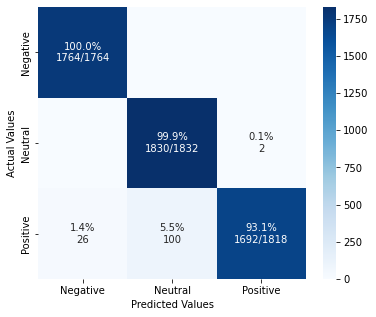

In [38]:
plot_cm(y_test, y_pred1)
print('\n')
print(classification_report(y_test, y_pred1))

##### For Decision Tree

In [40]:
parameters = {'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=d_tree,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=5)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

Accuracy: 87.83946 %
Best Parameters:  {'criterion': 'entropy'}


In [41]:
d_tree = DecisionTreeClassifier(criterion='entropy')

d_tree.fit(X_train, y_train)
y_pred2 = d_tree.predict(X_test)



              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1764
           1       0.87      0.91      0.89      1832
           2       0.88      0.82      0.85      1818

    accuracy                           0.89      5414
   macro avg       0.89      0.89      0.89      5414
weighted avg       0.89      0.89      0.89      5414



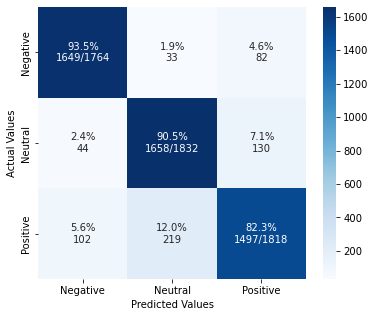

In [42]:
plot_cm(y_test, y_pred2)
print('\n')
print(classification_report(y_test, y_pred2))

##### For Random Forest

In [45]:
parameters = {'n_estimators':[10,50,75,100,200]}

grid_search = GridSearchCV(estimator=r_forrest,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=5)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

Accuracy: 96.83630 %
Best Parameters:  {'n_estimators': 200}


In [46]:
r_forrest = RandomForestClassifier(n_estimators=200)

r_forrest.fit(X_train, y_train)
y_pred3 = r_forrest.predict(X_test)



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1764
           1       0.97      0.98      0.97      1832
           2       0.97      0.96      0.96      1818

    accuracy                           0.98      5414
   macro avg       0.98      0.98      0.98      5414
weighted avg       0.98      0.98      0.98      5414



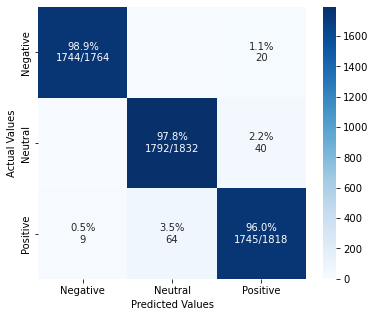

In [47]:
plot_cm(y_test, y_pred3)
print('\n')
print(classification_report(y_test, y_pred3))

##### For KNN

In [51]:
parameters = {'n_neighbors':[1,2,3,4,5]}

grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=3)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

Accuracy: 72.03031 %
Best Parameters:  {'n_neighbors': 1}


In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)

##### For Support Vector Classifier --> not implementing GridSearch



              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1764
           1       0.67      1.00      0.80      1832
           2       1.00      0.19      0.32      1818

    accuracy                           0.73      5414
   macro avg       0.81      0.73      0.66      5414
weighted avg       0.81      0.73      0.66      5414



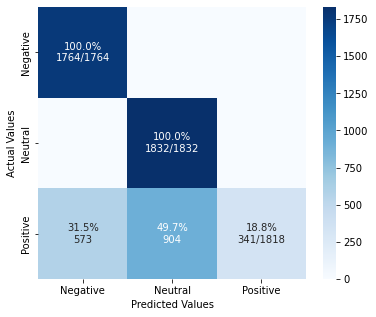

In [53]:
plot_cm(y_test, y_pred4)
print('\n')
print(classification_report(y_test, y_pred4))

In [59]:
svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)
y_pred5 = svm.predict(X_test)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       1.00      0.98      0.99      1832
           2       0.98      1.00      0.99      1818

    accuracy                           0.99      5414
   macro avg       0.99      0.99      0.99      5414
weighted avg       0.99      0.99      0.99      5414



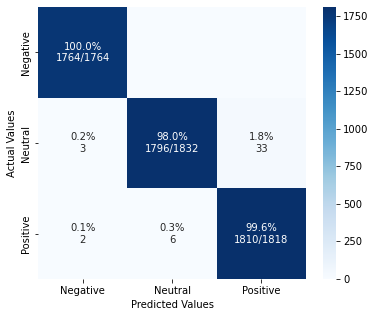

In [60]:
plot_cm(y_test, y_pred5)
print('\n')
print(classification_report(y_test, y_pred5))

In [57]:
svm2 = SVC(kernel='linear')

svm2.fit(X_train, y_train)


In [68]:
y_pred5 = svm2.predict(X_test)



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1764
           1       0.91      0.99      0.95      1832
           2       0.99      0.86      0.92      1818

    accuracy                           0.95      5414
   macro avg       0.95      0.95      0.95      5414
weighted avg       0.95      0.95      0.95      5414



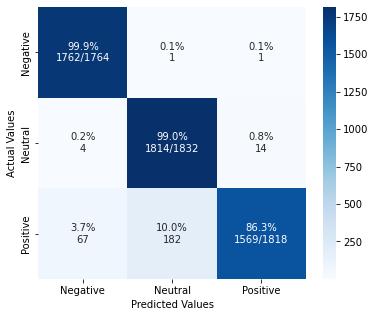

In [69]:
plot_cm(y_test, y_pred5)
print('\n')
print(classification_report(y_test, y_pred5))

##### For Naive Bayes'

In [61]:
parameters = {'alpha': [1, 1e-1, 1e-2]}

grid_search = GridSearchCV(estimator=naive_bayes,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=3)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

Accuracy: 92.07000 %
Best Parameters:  {'alpha': 0.01}


In [62]:
naive_bayes = MultinomialNB(alpha=0.01)

naive_bayes.fit(X_train, y_train)
y_pred6 = naive_bayes.predict(X_test)



              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1764
           1       0.88      0.95      0.92      1832
           2       0.95      0.84      0.90      1818

    accuracy                           0.92      5414
   macro avg       0.93      0.92      0.92      5414
weighted avg       0.93      0.92      0.92      5414



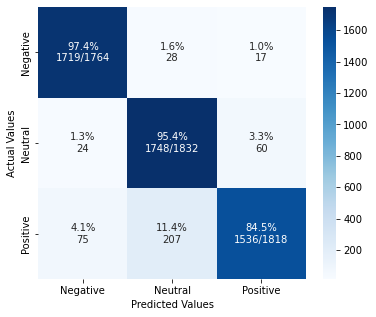

In [63]:
plot_cm(y_test, y_pred6)
print('\n')
print(classification_report(y_test, y_pred6))

##### For XG Boost

In [64]:
parameters = {'gamma':[0, 10, 50, 100, 200]}

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=3)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: {:.5f} %' .format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:26] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:35] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:04] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:31] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:56] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:24] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:52] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:18] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:45] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:15] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:00] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:44] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:28] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:08] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:57] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 95.66782 %
Best Parameters:  {'gamma': 0}


In [66]:
xgb = XGBClassifier(gamma=0)

xgb.fit(X_train, y_train)
y_pred7 = xgb.predict(X_test)

C:\Users\UMANG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1764
           1       0.95      0.96      0.95      1832
           2       0.95      0.94      0.94      1818

    accuracy                           0.96      5414
   macro avg       0.96      0.96      0.96      5414
weighted avg       0.96      0.96      0.96      5414



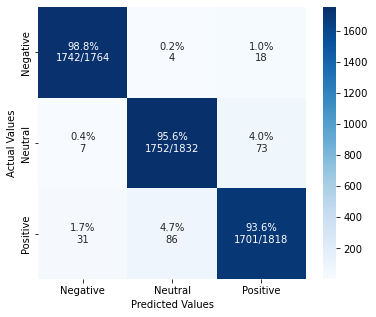

In [67]:
plot_cm(y_test, y_pred7)
print('\n')
print(classification_report(y_test, y_pred7))